<a href="https://colab.research.google.com/github/s17elgho/Salma_projects/blob/main/DL2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center> Basic Neural network implementations in Keras </center>



Try to execute the code with GPU for faster computation

In [ ]:
import numpy as np
from keras.layers import Dense, Activation ## layers of the model
from tensorflow.keras.optimizers import SGD ## for learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential ## for building the model

**I - XOR in Keras**

We train a simple Deep learning model to learn to predict XOR function, which is given by :<br>
x1=0, x2=0 ==> output = 0<br>
x1=1, x2=0 ==> output = 1<br>
x1=0, x2=1 ==> output = 1<br>
x1=1, x2=1 ==> output = 0<br>

*We choose the following neural network , feel free to change the architecture<br>
*Input dimension : 2<br>
*Number of neurones in hidden layer : 8 + Relu activation function<vr>
*Output dimension : 1 + Sigmoid activation function in order to have output between 0 and 1 <br>
*We can select SGD as an optimizer with 0.5 as learning rate<br>
*The cost function is a binary crossentropy which is adapted to binary output<br>


In [ ]:
X = np.array([[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]])
y = np.array([[0],[1],[1],[0]])
model = Sequential()
model.add(Dense(units = 8, input_dim = 2))
model.add(Activation('relu'))
model.add(Dense(units = 1))
model.add(Activation('sigmoid'))
sgd = SGD(lr=0.5)
model.compile(loss='binary_crossentropy',optimizer = sgd)

Now that the model is built, we can train It for example for 1000 epochs, we can choose batch_size=1

In [ ]:

model.fit(X,y, verbose=1, batch_size = 1, epochs = 1000)
print(model.predict(X))

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8090
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7668
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7554
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7263
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7359
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6925
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7118
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6921
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6933
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6220
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6706
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6445
Epoch 13/1000
4/4 [==============================

The output of the NN after training is so close from the true output we except in XOR function

## II MNIST

In this part, we want to build a model able to classify handwritten digits in MNIST dataset . We construct a simple Neural network. There are 10 classes : digits from 0 to 9

Download the data from Keras

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape


(60000, 28, 28)

Reshape each image into a flattened array of 28*28

In [ ]:
train = train_images.reshape(60000, 28*28)

In [ ]:
test = test_images.reshape(10000, 28*28)

Normalize entries between 0 and 1

In [ ]:
x_train = train.astype("float32") / 255
x_test = test.astype("float32") / 255

We One hot encode the labels so as we could have for each image one vector of dimension 10 as label, in this vector there are zeros everywhere except in the indice of the corresponding class . We use keras.utils.to_categorical to do so

In [ ]:
y_train = keras.utils.to_categorical(train_labels, 10) # 10 classes
y_test = keras.utils.to_categorical(test_labels, 10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

We build our model to train on x_train and y_train
We choose a simple architecture :<br>
input dimension : 784 = 28*28 <br>
first hidden layer of dimension 200 + tanh activation function <br>
second hidden layer of dimension 15 + tanh <br>
Output layer : 10 in dimension since we have 10 classes +softmax which is used in multiclass classification <br>


In [ ]:
model = Sequential()

model.add(Dense(200, input_dim=784))

model.add(Activation('tanh'))
model.add(Dense(15))
model.add(Activation('tanh'))
model.add(Dense(10))

model.add(Activation('softmax'))
 

We can add a validation set in order to diagnose the model's generalization performance during training. <br>
We select 15 epochs for training <br>
We choose a batch size of 128 <br>
We also show the accuracy on train and validation set <br>
Again , feel free to play with hyperparameters ! <br>

In [ ]:
sgd = SGD(lr=0.8)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 1s 3ms/step - loss: 0.4199 - accuracy: 0.8728 - val_loss: 0.2115 - val_accuracy: 0.9415
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1975 - accuracy: 0.9411 - val_loss: 0.1375 - val_accuracy: 0.9630
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1487 - accuracy: 0.9551 - val_loss: 0.1455 - val_accuracy: 0.9555
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1182 - accuracy: 0.9643 - val_loss: 0.1140 - val_accuracy: 0.9680
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0986 - accuracy: 0.9705 - val_loss: 0.1258 - val_accuracy: 0.9643
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0848 - accuracy: 0.9743 - val_loss: 0.0928 - val_accuracy: 0.9740
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0699 - accuracy: 0.9784 - val_loss: 0.1140 - val_accuracy: 0.9698
Epoch 

Here we evaluate model's performance on unseen data

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.1065123900771141
Test accuracy: 0.9731000065803528


==> 0.99 accuracy on train 
and 0.97 accuracy on test 

We can have fun plotting some predictions

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[7]


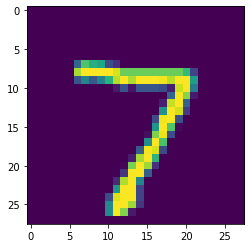

In [ ]:
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(test_images [0])
test_images = test_images.reshape((10000, 28 * 28))

test_images = test_images.astype('float32') / 255
img = test_images [0].reshape ((1, 28*28))
print (model.predict_classes(img))

==> correclty predicted example

[0]


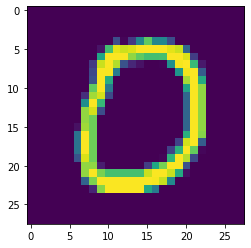

In [ ]:
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images [10])
test_images = test_images.reshape((10000, 28 * 28))

test_images = test_images.astype('float32') / 255
img = test_images [10].reshape ((1, 28*28))
print (model.predict_classes(img))

Another correctly predicted example

### III- IMDB

Here, we build a model to classify comments on movies . We have a dataset of IMDB containing comments on movies. There are two classes : positive and negative comments. <br>
We build a neural network and train It to fit these two classes <br>
Inspect the data to understand It

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


We need to one hot encode the comments into 10.000 dimension vectors like we did before with labels in the mnist data. But here we need to write some code ... 


In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i in range (len (sequences)):
        for j in range (len (sequences [i])):
            results [i] [sequences [i] [j]] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
y_train.shape

(25000,)

We build a model <br>
For example : <br>
Input dimension : 10.000 <br>
hidden layer : 20 neurones + relu <br>
hidden layer : 20 neurones + relu <br>
Output layer : 1 neurone + sigmoid

In [ ]:
model = Sequential()

model.add(Dense(20, activation='relu', input_shape=(10000,)))


model.add(Dense(20, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

We add this time a validation data specified by hand. <br>The loss is binary crossentropy because the problem is a binary classification.<br>
We use a different optimizer which is rmsprop

In [ ]:

model.compile(optimizer='rmsprop',

loss='binary_crossentropy',

metrics=['accuracy'])
x_val = x_train[:10000]

partial_x_train = x_train[10000:]
 
y_val = y_train[:10000]

partial_y_train = y_train[10000:]
history = model.fit (partial_x_train, partial_y_train,epochs=30, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 1s 29ms/step - loss: 0.5007 - accuracy: 0.7944 - val_loss: 0.3667 - val_accuracy: 0.8759
Epoch 2/30
30/30 [==============================] - 1s 20ms/step - loss: 0.2898 - accuracy: 0.9054 - val_loss: 0.2974 - val_accuracy: 0.8857
Epoch 3/30
30/30 [==============================] - 1s 20ms/step - loss: 0.2099 - accuracy: 0.9283 - val_loss: 0.2922 - val_accuracy: 0.8823
Epoch 4/30
30/30 [==============================] - 1s 21ms/step - loss: 0.1702 - accuracy: 0.9428 - val_loss: 0.2738 - val_accuracy: 0.8910
Epoch 5/30
30/30 [==============================] - 1s 20ms/step - loss: 0.1386 - accuracy: 0.9540 - val_loss: 0.2959 - val_accuracy: 0.8827
Epoch 6/30
30/30 [==============================] - 1s 19ms/step - loss: 0.1080 - accuracy: 0.9677 - val_loss: 0.3490 - val_accuracy: 0.8696
Epoch 7/30
30/30 [==============================] - 1s 20ms/step - loss: 0.0909 - accuracy: 0.9726 - val_loss: 0.3689 - val_accuracy: 0.8729
Epoch 8/30
30

We can plot validation loss evolution and train loss evolution against epochs in order to check if there is any overfitting or underfitting of our model ... This is also possible for accuracy 

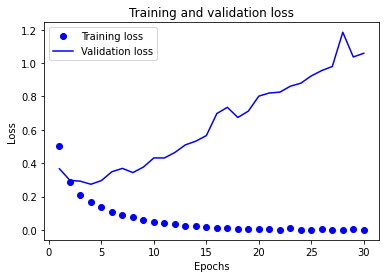

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Clearly we have overfitted the train data !!!

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.1564455032348633
Test accuracy: 0.8463600277900696


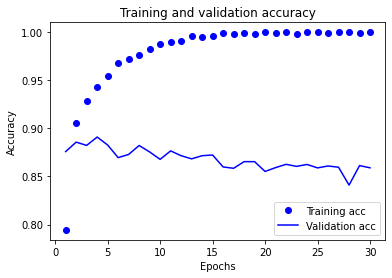

In [ ]:
plt.clf() #Clears the figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The train acc is far better than validation and test accuracy ! We can do better by reducing maybe the complexity of the model :)


                                              Deep learning - séance 3

We use the same model as last time but we try to overcome overfitting problem using two methods : 




1.   L2 regularization







We use L2 regularization for all weights of the layers, we choose a value of 0.01 for regularization

In [ ]:
from tensorflow.keras import regularizers

model2 = Sequential()

model2.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10000,)))


model2.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model2.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

In [ ]:

model2.compile(optimizer='rmsprop',

loss='binary_crossentropy',

metrics=['accuracy'])
x_val = x_train[:10000]

partial_x_train = x_train[10000:]
 
y_val = y_train[:10000]

partial_y_train = y_train[10000:]
history = model2.fit (partial_x_train, partial_y_train,epochs=30, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 1s 29ms/step - loss: 0.8526 - accuracy: 0.7729 - val_loss: 0.6816 - val_accuracy: 0.8542
Epoch 2/30
30/30 [==============================] - 1s 19ms/step - loss: 0.6234 - accuracy: 0.8768 - val_loss: 0.6387 - val_accuracy: 0.8401
Epoch 3/30
30/30 [==============================] - 1s 20ms/step - loss: 0.5642 - accuracy: 0.8877 - val_loss: 0.5624 - val_accuracy: 0.8791
Epoch 4/30
30/30 [==============================] - 1s 20ms/step - loss: 0.5272 - accuracy: 0.8958 - val_loss: 0.5383 - val_accuracy: 0.8792
Epoch 5/30
30/30 [==============================] - 1s 19ms/step - loss: 0.5023 - accuracy: 0.8982 - val_loss: 0.5543 - val_accuracy: 0.8567
Epoch 6/30
30/30 [==============================] - 1s 20ms/step - loss: 0.4899 - accuracy: 0.8971 - val_loss: 0.5122 - val_accuracy: 0.8798
Epoch 7/30
30/30 [==============================] - 1s 19ms/step - loss: 0.4743 - accuracy: 0.9003 - val_loss: 0.5092 - val_accuracy: 0.8739
Epoch 8/30
30

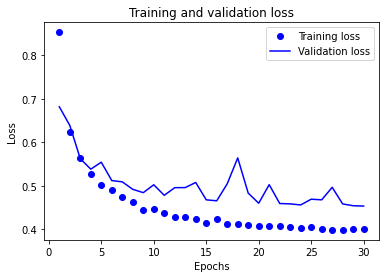

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

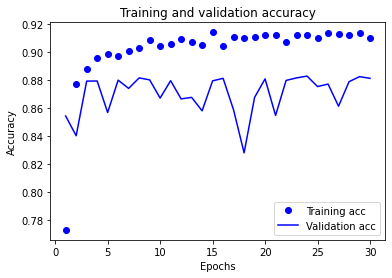

In [ ]:
plt.clf() #Clears the figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.1564455032348633
Test accuracy: 0.8463600277900696


In [ ]:
score = model2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.4624776244163513
Test accuracy: 0.8772799968719482


Clearly regularization has enhanced the model performance on validation set (generalization )


2.   Dropout



  Use Dropout as another technique for reducing overfitting


In [ ]:
model3 = Sequential()

model3.add(Dense(20, activation='relu', input_shape=(10000,)))

model3.add(keras.layers.Dropout(0.8))
model3.add(Dense(20, activation='relu'))

model3.add(keras.layers.Dropout(0.1))
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
model3.compile(optimizer='rmsprop',

loss='binary_crossentropy',

metrics=['accuracy'])
x_val = x_train[:10000]

partial_x_train = x_train[10000:]
 
y_val = y_train[:10000]

partial_y_train = y_train[10000:]
history = model3.fit (partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.6481 - accuracy: 0.6186 - val_loss: 0.5480 - val_accuracy: 0.8107
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5464 - accuracy: 0.7364 - val_loss: 0.4348 - val_accuracy: 0.8663
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4732 - accuracy: 0.7935 - val_loss: 0.3821 - val_accuracy: 0.8759
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4167 - accuracy: 0.8279 - val_loss: 0.3312 - val_accuracy: 0.8804
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3810 - accuracy: 0.8458 - val_loss: 0.3056 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3522 - accuracy: 0.8603 - val_loss: 0.3054 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3303 - accuracy: 0.8687 - val_loss: 0.2852 - val_accuracy: 0.8821
Epoch 8/20
30

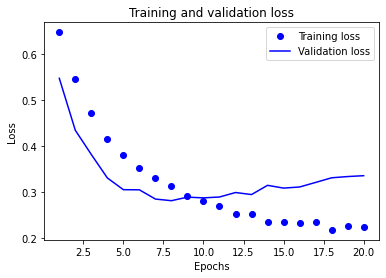

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
score = model3.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3510195016860962
Test accuracy: 0.8755599856376648


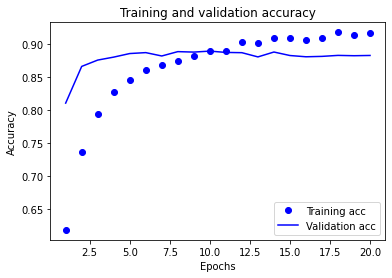

In [ ]:
plt.clf() #Clears the figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

==> model with droupout (model 3 ) no longer overfits the train set  

**VI- REUTERS MULTICLASS CLASSIFICATION**

Reuters is a document classification dataset. In this example, we have different 46 topics

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [ ]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24])

We encode the data (same code as in IMDB) with 10000 dimension

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i in range (len (sequences)):
        for j in range (len (sequences [i])):
            results [i] [sequences [i] [j]] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)



In [ ]:
x_train.shape , y_train.shape

((8982, 10000), (8982, 46))

In [ ]:
x_test.shape 

(2246, 10000)

In [ ]:
y_train = keras.utils.to_categorical(train_labels, 46) # 46 classes
y_test = keras.utils.to_categorical(test_labels, 46)

We define the model's architecture and train it using validation set

In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(10000,)))


model.add(Dense(64, activation='relu'))


model.add(Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',

loss="categorical_crossentropy",

metrics=['accuracy'])

history = model.fit (x_train, y_train,epochs=20, batch_size=512, validation_split=0.1)


Epoch 1/20
16/16 [==============================] - 0s 24ms/step - loss: 3.2551 - accuracy: 0.4245 - val_loss: 2.5881 - val_accuracy: 0.5306
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 2.0130 - accuracy: 0.6110 - val_loss: 1.7518 - val_accuracy: 0.6529
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.3718 - accuracy: 0.7104 - val_loss: 1.4117 - val_accuracy: 0.7008
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0536 - accuracy: 0.7712 - val_loss: 1.2567 - val_accuracy: 0.7308
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8352 - accuracy: 0.8207 - val_loss: 1.1731 - val_accuracy: 0.7442
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6617 - accuracy: 0.8630 - val_loss: 1.1129 - val_accuracy: 0.7553
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5198 - accuracy: 0.8943 - val_loss: 1.0556 - val_accuracy: 0.7798
Epoch 8/20
16

Since it is a multiclass classification problem, we use classification_report to visualize the model's prediction performance on each class

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
Y_train = np.argmax(y_train, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(x_train)
print(classification_report(Y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        55
           1       0.96      0.95      0.95       432
           2       0.99      0.96      0.97        74
           3       0.96      0.98      0.97      3159
           4       0.97      0.95      0.96      1949
           5       0.88      0.88      0.88        17
           6       1.00      0.96      0.98        48
           7       1.00      0.81      0.90        16
           8       0.93      0.91      0.92       139
           9       0.93      0.97      0.95       101
          10       0.90      0.94      0.92       124
          11       0.95      0.93      0.94       390
          12       0.98      0.86      0.91        49
          13       0.94      0.94      0.94       172
          14       0.90      0.73      0.81        26
          15       1.00      0.95      0.97        20
          16       0.92      0.95      0.94       444
          17       0.95    

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(x_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.68      0.75      0.71       105
           2       0.79      0.55      0.65        20
           3       0.90      0.94      0.92       813
           4       0.85      0.86      0.85       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.33      0.50         3
           8       0.71      0.76      0.73        38
           9       0.83      0.76      0.79        25
          10       0.76      0.87      0.81        30
          11       0.59      0.73      0.65        83
          12       0.67      0.31      0.42        13
          13       0.67      0.59      0.63        37
          14       0.00      0.00      0.00         2
          15       0.50      0.22      0.31         9
          16       0.62      0.78      0.69        99
          17       0.50    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The neural network performs badly on some classes with low support :/

we plot the history graph of training

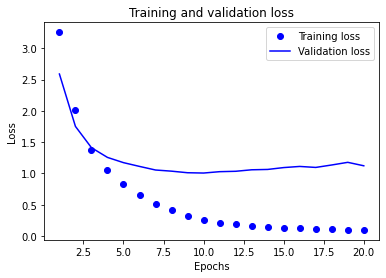

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

That's Another example of overfitting !!!!

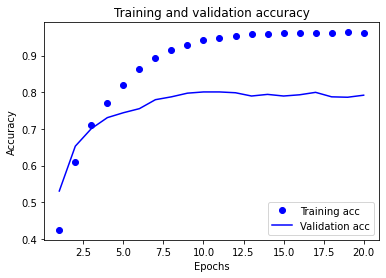

In [ ]:
plt.clf() #Clears the figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Let's add some regularization

In [ ]:
model2 = Sequential()

model2.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape=(10000,)))


model2.add(Dense(64,kernel_regularizer=regularizers.l2(0.01) ,activation='relu'))


model2.add(Dense(46, kernel_regularizer=regularizers.l2(0.001) ,activation='softmax'))

In [ ]:
model2.compile(optimizer='adam',

loss="categorical_crossentropy",

metrics=['accuracy'])

history = model2.fit (x_train, y_train,epochs=20, batch_size=512, validation_split=0.1)


Epoch 1/20
16/16 [==============================] - 0s 25ms/step - loss: 4.7136 - accuracy: 0.3928 - val_loss: 3.6922 - val_accuracy: 0.5250
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 3.0735 - accuracy: 0.5811 - val_loss: 2.6767 - val_accuracy: 0.5951
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 2.3392 - accuracy: 0.6595 - val_loss: 2.2861 - val_accuracy: 0.6741
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 2.0488 - accuracy: 0.7116 - val_loss: 2.1086 - val_accuracy: 0.7019
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 1.8860 - accuracy: 0.7371 - val_loss: 1.9979 - val_accuracy: 0.7108
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 1.7727 - accuracy: 0.7554 - val_loss: 1.9262 - val_accuracy: 0.7086
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 1.6903 - accuracy: 0.7657 - val_loss: 1.8687 - val_accuracy: 0.7230
Epoch 8/20
16

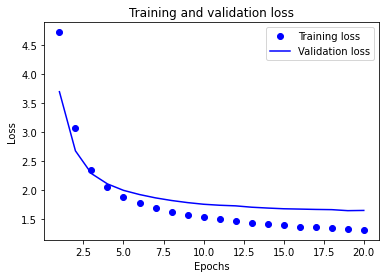

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

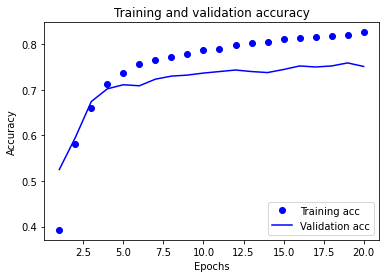

In [ ]:
plt.clf() #Clears the figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Let's add another layer ! and train longer !

In [ ]:
model3 = Sequential()

model3.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape=(10000,)))


model3.add(Dense(64,kernel_regularizer=regularizers.l2(0.01) ,activation='relu'))
model3.add(Dense(64,kernel_regularizer=regularizers.l2(0.01) ,activation='relu'))

model3.add(Dense(46, kernel_regularizer=regularizers.l2(0.001) ,activation='softmax'))

In [ ]:
model3.compile(optimizer='adam',

loss="categorical_crossentropy",

metrics=['accuracy'])

history = model3.fit (x_train, y_train,epochs=50, batch_size=512, validation_split=0.1)


Epoch 1/50
16/16 [==============================] - 0s 26ms/step - loss: 5.2128 - accuracy: 0.3416 - val_loss: 4.0885 - val_accuracy: 0.4627
Epoch 2/50
16/16 [==============================] - 0s 15ms/step - loss: 3.4537 - accuracy: 0.5348 - val_loss: 3.0378 - val_accuracy: 0.5495
Epoch 3/50
16/16 [==============================] - 0s 15ms/step - loss: 2.7569 - accuracy: 0.6217 - val_loss: 2.6549 - val_accuracy: 0.6563
Epoch 4/50
16/16 [==============================] - 0s 15ms/step - loss: 2.4428 - accuracy: 0.6881 - val_loss: 2.4496 - val_accuracy: 0.6841
Epoch 5/50
16/16 [==============================] - 0s 16ms/step - loss: 2.2335 - accuracy: 0.7090 - val_loss: 2.2990 - val_accuracy: 0.6941
Epoch 6/50
16/16 [==============================] - 0s 16ms/step - loss: 2.0755 - accuracy: 0.7206 - val_loss: 2.1879 - val_accuracy: 0.7019
Epoch 7/50
16/16 [==============================] - 0s 16ms/step - loss: 1.9542 - accuracy: 0.7286 - val_loss: 2.1022 - val_accuracy: 0.7019
Epoch 8/50
16

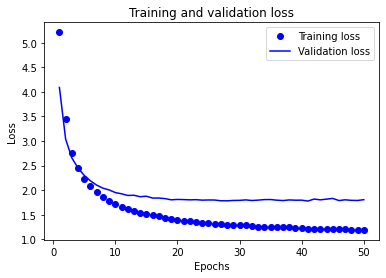

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

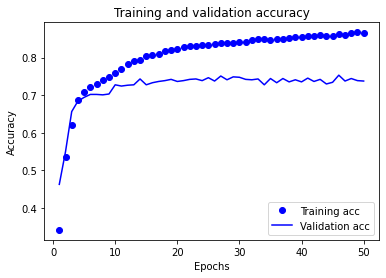

In [ ]:
plt.clf() #Clears the figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.0775543451309204
Test accuracy: 0.8000890612602234


In [ ]:
score = model2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.5784398317337036
Test accuracy: 0.7528940439224243


In [ ]:
score = model3.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.6895242929458618
Test accuracy: 0.7502226233482361
